In [1]:
%config IPCompleter.use_jedi = False
%pdb off
# %load_ext viztracer
# from viztracer import VizTracer
%load_ext autoreload
%autoreload 3
import sys
from pathlib import Path

# required to enable non-blocking interaction:
%gui qt5

from copy import deepcopy
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
# pd.options.mode.dtype_backend = 'pyarrow' # use new pyarrow backend instead of numpy
from attrs import define, field, fields, Factory

# Pho's Formatting Preferences
from pyphocorehelpers.preferences_helpers import set_pho_preferences, set_pho_preferences_concise, set_pho_preferences_verbose
set_pho_preferences_concise()

## Pho's Custom Libraries:
from pyphocorehelpers.Filesystem.path_helpers import find_first_extant_path
from pyphocorehelpers.Filesystem.open_in_system_file_manager import reveal_in_system_file_manager
from pyphocorehelpers.geometry_helpers import point_tuple_mid_point, BoundsRect, is_point_in_rect
from shapely.geometry import Polygon
from pyphoplacecellanalysis.Pho2D.track_shape_drawing import ScaleFactors, LinearTrackDimensions, LinearTrackInstance, test_LinearTrackDimensions_2D_pyqtgraph, test_LinearTrackDimensions_2D_Matplotlib, add_vertical_track_bounds_lines, add_track_shapes

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

Automatic pdb calling has been turned OFF


In [2]:
# Built Long/Short Test Track Dims:
long_track_dims = LinearTrackDimensions(track_length=170.0)
short_track_dims = LinearTrackDimensions(track_length=100.0)

214.0

In [3]:
long_track_aspect_ratio = long_track_dims.total_width / long_track_dims.total_length  # ptp: peak to peak (range)
print(f'Long Track aspect_ratio: {long_track_aspect_ratio}')

Long Track aspect_ratio: 0.102803738317757


In [4]:
short_track_aspect_ratio = short_track_dims.total_width / short_track_dims.total_length  # ptp: peak to peak (range)
print(f'Short Track aspect_ratio: {short_track_aspect_ratio}')

Short Track aspect_ratio: 0.1527777777777778


In [ ]:
occupancy_ax.set_aspect(aspect_ratio, adjustable='box')

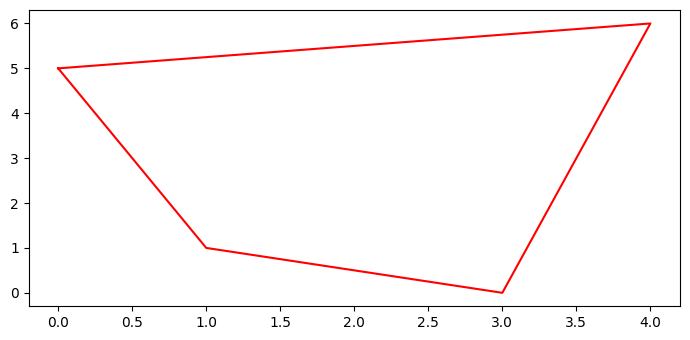

In [5]:
polygon1 = Polygon([(0, 5),
   (1, 1),
   (3, 0),
   (4, 6),
])
x, y = polygon1.exterior.xy
plt.plot(x, y, c="red")
plt.show()

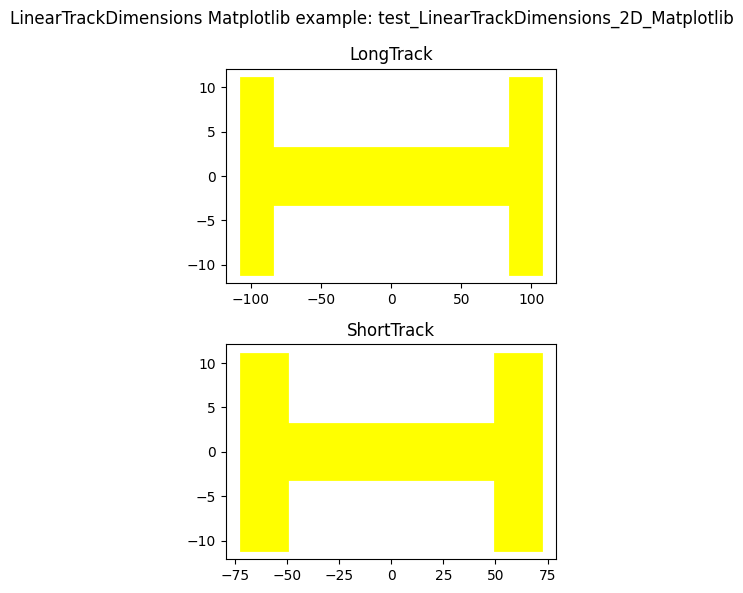

(<Figure size 400x600 with 2 Axes>,
 <Axes: title={'center': 'LongTrack'}>,
 <Axes: title={'center': 'ShortTrack'}>)

In [6]:

test_LinearTrackDimensions_2D_Matplotlib()

In [4]:
# <i class="fa-solid fa-clone"></i>
# form_item_layout = ipywidgets.Layout(
#     display='flex',
#     flex_flow='row',
#     justify_content='space-between'
# )

icons = ['clock-rotate-left', 'folder-tree', 'rev', 'file-import', 'file-export', 'upload', 'download', 'file-zipper', 'box-archive', 'message', 'road', 'file-arrow-up', 'file-arrow-down']
rendering_icons = ['vector-square', 'draw-polygon', 'object-group']

button = widgets.Button(
    description='Click me',
	layout=widgets.Layout(flex='0 1 auto', width='auto', margin='0px'),
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)
secondary_button = widgets.Button(
    description='',
	layout=widgets.Layout(flex='0 1 auto', width='auto', margin='0px'), # means it won't grow beyond its content's width, can shrink if needed, and its basis is auto.
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='clone' # (FontAwesome names without the `fa-` prefix)
)
another_button = widgets.Button(description='', layout=widgets.Layout(flex='0 1 auto', width='auto', margin='0px'), disabled=False, button_style='info', tooltip='Click me', icon='clone')

# widgets.HBox([button, secondary_button])

items_auto = [button, secondary_button, another_button]
box_layout = widgets.Layout(display='flex', flex_flow='row', align_items='stretch', width='70%')
box_auto = widgets.Box(children=items_auto, layout=box_layout)
box_auto

NameError: name 'widgets' is not defined